## This script is used to visualize the results from PEST++IES

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the annual loads
file_dates = ['20220118_full', '20220123', '20220125', '20220126', '20220128', '20220129', '20220130', '20220201', '20220203', '20220204']
ind_results = [26, 12, 24, 8, 12, 12, 8, 11, 9, 7]
fpaths = [f'../../output/work_run_{fd}/' for fd in file_dates]
fig_path = '../../output/figs/'

In [2]:
for k in range(len(ind_results)):
    print(f'-------------Run for {k}-------------')
    fpath = fpaths[k]
    ind_result = ind_results[k]
    pars = pd.read_csv(f'{fpath}126001A.{ind_result}.par.csv', index_col = 'real_name')
    obs = pd.read_csv(f'{fpath}126001A.{ind_result}.obs.csv', index_col = 'real_name')
    phi_group = pd.read_csv(f'{fpath}126001A.phi.group.csv')
    # transform parameters into the original ranges
    # read files containing parameter ranges
    par_range = pd.read_csv(f'{fpath}parameters.tpl', skiprows=1, index_col = 'parameter')
    for col in list(par_range.index):
        val_low, val_up = par_range.loc[col, 'lower'], par_range.loc[col, 'upper']
        pars[col.lower()] = pars[col.lower()]*(val_up - val_low) / 100 + val_low
    pars.drop(columns=['lcf'], inplace=True)
    # select the parameter columns to plot
    joint_columns = [*pars.columns[:3], *pars.columns[-2:]]
    # pars = pars[(pars.din_pbias>-25) and (pars.din_pbias<25)]
    # plot the realizations of parameter ensemble
    fig = plt.figure(figsize=(10, 10))
    sns.set(font_scale=1.2)
    ax = sns.pairplot(pars,kind='scatter',diag_kind='hist') #[joint_columns],
    plt.savefig(f'{fig_path}all_pars_pairplot_run_{file_dates[k]}.png', format='png', dpi=300)

F:\Anaconda\envs\oed\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
F:\Anaconda\envs\oed\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


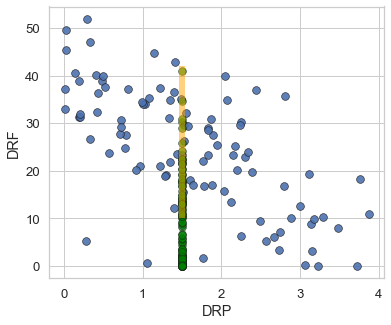

In [69]:
# Scatter plot of DRP and DRF
k = 2
fpath = fpaths[k]
ind_result = ind_results[k]
pars = pd.read_csv(f'{fpath}126001A.{ind_result}.par.csv', index_col = 'real_name')
obs = pd.read_csv(f'{fpath}126001A.{ind_result}.obs.csv', index_col = 'real_name')

pars_fix = pd.read_csv(f'{fpaths[3]}126001A.{ind_results[3]}.par.csv', index_col = 'real_name')
obs_fix = pd.read_csv(f'{fpaths[3]}126001A.{ind_results[3]}.obs.csv', index_col = 'real_name')
phi_group_fix = pd.read_csv(f'{fpaths[3]}126001A.phi.group.csv')
# transform parameters into the original ranges
# read files containing parameter ranges
par_range = pd.read_csv(f'{fpath}parameters.tpl', skiprows=1, index_col = 'parameter')
for col in list(par_range.index):
    val_low, val_up = par_range.loc[col, 'lower'], par_range.loc[col, 'upper']
    pars[col.lower()] = pars[col.lower()]*(val_up - val_low) / 100 + val_low
    pars_fix[col.lower()] = pars_fix[col.lower()]*(val_up - val_low) / 100 + val_low

pars.drop(columns=['lcf'], inplace=True)
pars.reset_index(inplace=True)
pars_fix.drop(columns=['lcf'], inplace=True)
pars_fix.reset_index(inplace=True)
# select the parameter columns to plot
joint_columns = [*pars.columns[:3], *pars.columns[-2:]]
# plot the realizations of parameter ensemble
fig = plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
ax = sns.scatterplot(pars['drp'].values, pars['drf'].values, ec='k', alpha=0.9, marker='o', s=60)
sns.scatterplot(pars_fix['drp'].values, pars_fix['drf'].values, ax=ax, ec='k', marker='o', s=60, color='green', alpha=0.7);

ax.vlines(1.5, 10, 42, colors='orange', alpha=0.5, lw=6)
ax.set_ylabel('DRF');
ax.set_xlabel('DRP');
plt.savefig(f'{fig_path}drp_drf.png', format='png', dpi=300)

<Figure size 432x360 with 0 Axes>

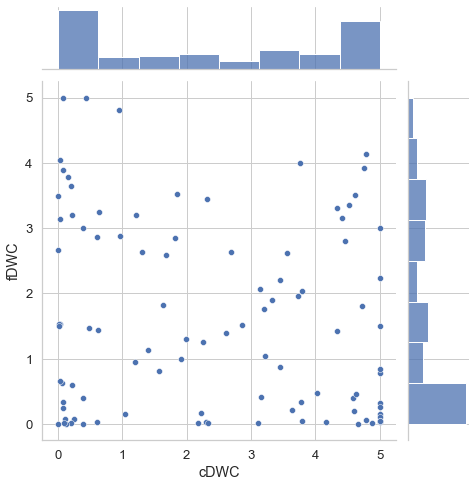

In [83]:
# Scatter plot of DRP and DRF
k = 3
fpath = fpaths[k]
ind_result = ind_results[k]
pars = pd.read_csv(f'{fpath}126001A.{ind_result}.par.csv', index_col = 'real_name')
obs = pd.read_csv(f'{fpath}126001A.{ind_result}.obs.csv', index_col = 'real_name')

pars_fix = pd.read_csv(f'{fpaths[3]}126001A.{ind_results[3]}.par.csv', index_col = 'real_name')
obs_fix = pd.read_csv(f'{fpaths[3]}126001A.{ind_results[3]}.obs.csv', index_col = 'real_name')
phi_group_fix = pd.read_csv(f'{fpaths[3]}126001A.phi.group.csv')
# transform parameters into the original ranges
# read files containing parameter ranges
par_range = pd.read_csv(f'{fpath}parameters.tpl', skiprows=1, index_col = 'parameter')
for col in list(par_range.index):
    val_low, val_up = par_range.loc[col, 'lower'], par_range.loc[col, 'upper']
    pars[col.lower()] = pars[col.lower()]*(val_up - val_low) / 100 + val_low
    pars_fix[col.lower()] = pars_fix[col.lower()]*(val_up - val_low) / 100 + val_low

pars.drop(columns=['lcf'], inplace=True)
pars.reset_index(inplace=True)
pars_fix.drop(columns=['lcf'], inplace=True)
pars_fix.reset_index(inplace=True)
# select the parameter columns to plot
joint_columns = [*pars.columns[:3], *pars.columns[-2:]]
# plot the realizations of parameter ensemble
fig = plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
ax = sns.jointplot(x = 'cdwc', y='fdwc', data=pars, color='b', height=7)
# sns.scatterplot(pars_fix['cdwc'].values, pars_fix['fdwc'].values, ax=ax, ec='k', marker='o', s=60, color='green', alpha=0.7);

# ax.vlines(1.5, 0, 5, colors='grey', alpha=0.5, lw=3, ls='--')
# ax.hlines(2.3, 0, 5, colors='green', alpha=0.5, lw=3, ls='--')
ax.set_axis_labels('cDWC', 'fDWC');
# plt.xlabel('fDWC');
plt.savefig(f'{fig_path}cdwc_fdwc.png', format='png', dpi=300)

## Unused code below

In [23]:
# Calculate the weighted summed squared errors
pars = pd.read_csv(f'{fpath}126001A.{ind_result}.par.csv', index_col = 'real_name')
obs = pd.read_csv(f'{fpath}126001A.{ind_result}.obs.csv', index_col = 'real_name')
meas_noised = pd.read_csv(f'{fpath}126001A.base.obs.csv', index_col = 'real_name').loc[obs.index, :]
    
weight = 4.36*1e-5

In [24]:
resid = obs - meas_noised
resid['SSE'] =  (weight ** 2) * resid.applymap(lambda x: x**2).\
    loc[:, 'din_2009':'din_2017'].sum(axis=1)
# resid.to_csv(fig_path+'resid_0420.csv')

In [25]:
# calculate the errors for each parameter ensemble
pars['din_pbias'] = resid['din_pbias'].values
pars['lsq_annual'] = resid['SSE'].values

In [26]:
# select the parameter columns to plot
joint_columns = [*pars.columns[:3], *pars.columns[-2:]]
# pars = pars[(pars.din_pbias>-25) and (pars.din_pbias<25)]

In [1]:
# plot the realizations of parameter ensemble
fig = plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
ax = sns.pairplot(pars,kind='scatter',diag_kind='hist') #[joint_columns# # # ],
# plt.savefig(f'{fig_path}all_pars_pairplot_run_0420_new.png', format='png', dpi=300)